In [47]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [39]:
df = pd.read_csv('data/WSN-DS.csv')

In [40]:
df.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [41]:
df.describe()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [43]:
df.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
dtype: int64

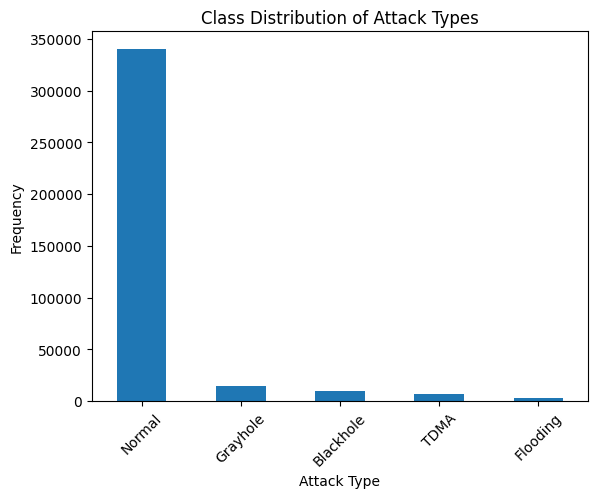

In [44]:
df['Attack type'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [45]:
attack_type_counts = df['Attack type'].value_counts()
print(attack_type_counts)

Attack type
Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
Name: count, dtype: int64


# Addressing Class Imbalance with a Diffusion Model

The dataset is highly imbalanced. To address this, we will use a Denoising Diffusion Probabilistic Model (DDPM) to generate synthetic samples for the minority classes. This approach helps balance the dataset and improve model performance on underrepresented attack types.

In [56]:
# Extract minority class samples and preprocess for DDPM
from sklearn.preprocessing import StandardScaler

# Identify the majority and minority classes
majority_class = attack_type_counts.idxmax()
minority_classes = attack_type_counts[attack_type_counts < attack_type_counts.max()].index.tolist()

# Filter minority class samples
df_minority = df[df['Attack type'].isin(minority_classes)]

# Select features (excluding label columns)
features = df_minority.drop(['Attack type'], axis=1).select_dtypes(include=[np.number])
labels = df_minority['Attack type'].values

# Standardize features
scaler = StandardScaler()
X_minority = scaler.fit_transform(features)

print(f"Minority classes: {minority_classes}")
print(f"Shape of minority class data: {X_minority.shape}")

Minority classes: ['Grayhole', 'Blackhole', 'TDMA', 'Flooding']
Shape of minority class data: (34595, 19)


In [57]:
# Define a simple DDPM architecture using PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleDDPM(nn.Module):
    def __init__(self, input_dim, hidden_dim=128):
        super(SimpleDDPM, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, input_dim)

    def forward(self, x, t):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        return self.fc3(h)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_dim = X_minority.shape[1]
ddpm = SimpleDDPM(input_dim).to(device)

In [58]:
# Implement DDPM training loop for minority class data
import tqdm

def linear_beta_schedule(timesteps):
    beta_start = 0.0001
    beta_end = 0.02
    return torch.linspace(beta_start, beta_end, timesteps)

timesteps = 100
betas = linear_beta_schedule(timesteps).to(device)
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)

optimizer = torch.optim.Adam(ddpm.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

X_tensor = torch.tensor(X_minority, dtype=torch.float32).to(device)

for epoch in range(10):  # You can increase epochs for better results
    for i in tqdm.tqdm(range(X_tensor.shape[0])):
        x_0 = X_tensor[i].unsqueeze(0)
        t = torch.randint(0, timesteps, (1,), device=device).long()
        noise = torch.randn_like(x_0)
        sqrt_alphas_cumprod_t = torch.sqrt(alphas_cumprod[t])
        sqrt_one_minus_alphas_cumprod_t = torch.sqrt(1 - alphas_cumprod[t])
        x_t = sqrt_alphas_cumprod_t * x_0 + sqrt_one_minus_alphas_cumprod_t * noise
        predicted_noise = ddpm(x_t, t.float())
        loss = loss_fn(predicted_noise, noise)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

100%|██████████| 34595/34595 [00:13<00:00, 2562.27it/s]


Epoch 1, Loss: 1.0516


100%|██████████| 34595/34595 [00:13<00:00, 2592.96it/s]


Epoch 2, Loss: 0.2923


100%|██████████| 34595/34595 [00:13<00:00, 2578.49it/s]


Epoch 3, Loss: 0.3725


100%|██████████| 34595/34595 [00:13<00:00, 2570.13it/s]



Epoch 4, Loss: 0.2046


100%|██████████| 34595/34595 [00:13<00:00, 2576.47it/s]


Epoch 5, Loss: 0.3353


100%|██████████| 34595/34595 [00:13<00:00, 2581.72it/s]


Epoch 6, Loss: 0.2380


100%|██████████| 34595/34595 [00:13<00:00, 2585.78it/s]


Epoch 7, Loss: 0.0802


100%|██████████| 34595/34595 [00:13<00:00, 2610.54it/s]


Epoch 8, Loss: 0.5107


100%|██████████| 34595/34595 [00:13<00:00, 2588.96it/s]


Epoch 9, Loss: 0.2433


100%|██████████| 34595/34595 [00:13<00:00, 2594.71it/s]

Epoch 10, Loss: 1.1474


In [59]:
# Generate synthetic samples using the trained DDPM and augment the dataset
num_synthetic = attack_type_counts.max() - attack_type_counts[minority_classes].max()
synthetic_samples = []
ddpm.eval()

for _ in range(num_synthetic):
    x_t = torch.randn(1, input_dim).to(device)
    for t in reversed(range(timesteps)):
        t_tensor = torch.full((1,), t, device=device, dtype=torch.float32)
        predicted_noise = ddpm(x_t, t_tensor)
        alpha = alphas[t]
        alpha_cumprod = alphas_cumprod[t]
        x_t = (x_t - (1 - alpha).sqrt() * predicted_noise) / alpha.sqrt()
        if t > 0:
            noise = torch.randn_like(x_t)
            x_t += betas[t].sqrt() * noise
    synthetic = x_t.detach().cpu().numpy().squeeze()
    synthetic_samples.append(synthetic)

synthetic_samples = scaler.inverse_transform(np.array(synthetic_samples))

# Create a DataFrame for synthetic samples (assign to a random minority class)
synthetic_df = pd.DataFrame(synthetic_samples, columns=features.columns)
synthetic_df['Attack type'] = np.random.choice(minority_classes, size=num_synthetic)

# Augment the original dataframe
df_augmented = pd.concat([df, synthetic_df], ignore_index=True)
print(f"Original dataset shape: {df.shape}")
print(f"Augmented dataset shape: {df_augmented.shape}")

Original dataset shape: (374661, 20)
Augmented dataset shape: (700131, 20)


# Evaluating the Effectiveness of DDPM-Generated Synthetic Data

To assess the impact of the DDPM model, we will compare the performance of a classifier trained on the original imbalanced dataset versus the augmented dataset (with synthetic samples). We will use metrics such as accuracy, F1-score, and recall, with a focus on the minority classes.

In [60]:
# Train and evaluate a classifier on the original imbalanced dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Prepare features and labels for the original dataset
X_orig = df.drop(['Attack type'], axis=1).select_dtypes(include=[np.number])
y_orig = df['Attack type']

X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.2, stratify=y_orig, random_state=42)

clf_orig = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_orig.fit(X_train, y_train)
y_pred_orig = clf_orig.predict(X_test)

print("Classification Report (Original Dataset):")
print(classification_report(y_test, y_pred_orig, digits=4))

Classification Report (Original Dataset):
              precision    recall  f1-score   support

   Blackhole     1.0000    1.0000    1.0000      2010
    Flooding     1.0000    1.0000    1.0000       662
    Grayhole     1.0000    1.0000    1.0000      2919
      Normal     1.0000    1.0000    1.0000     68014
        TDMA     1.0000    1.0000    1.0000      1328

    accuracy                         1.0000     74933
   macro avg     1.0000    1.0000    1.0000     74933
weighted avg     1.0000    1.0000    1.0000     74933

              precision    recall  f1-score   support

   Blackhole     1.0000    1.0000    1.0000      2010
    Flooding     1.0000    1.0000    1.0000       662
    Grayhole     1.0000    1.0000    1.0000      2919
      Normal     1.0000    1.0000    1.0000     68014
        TDMA     1.0000    1.0000    1.0000      1328

    accuracy                         1.0000     74933
   macro avg     1.0000    1.0000    1.0000     74933
weighted avg     1.0000    1.0000  

In [61]:
# Train and evaluate a classifier on the augmented dataset with DDPM synthetic samples
X_aug = df_augmented.drop(['Attack type'], axis=1).select_dtypes(include=[np.number])
y_aug = df_augmented['Attack type']

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_aug, y_aug, test_size=0.2, stratify=y_aug, random_state=42)

clf_aug = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_aug.fit(X_train_aug, y_train_aug)
y_pred_aug = clf_aug.predict(X_test_aug)

print("Classification Report (Augmented Dataset):")
print(classification_report(y_test_aug, y_pred_aug, digits=4))

Classification Report (Augmented Dataset):
              precision    recall  f1-score   support

   Blackhole     0.3254    0.3579    0.3409     18268
    Flooding     0.2839    0.2843    0.2841     16872
    Grayhole     0.3688    0.3502    0.3593     19099
      Normal     1.0000    1.0000    1.0000     68014
        TDMA     0.3047    0.2895    0.2969     17774

    accuracy                         0.6512    140027
   macro avg     0.4566    0.4564    0.4562    140027
weighted avg     0.6514    0.6512    0.6511    140027

              precision    recall  f1-score   support

   Blackhole     0.3254    0.3579    0.3409     18268
    Flooding     0.2839    0.2843    0.2841     16872
    Grayhole     0.3688    0.3502    0.3593     19099
      Normal     1.0000    1.0000    1.0000     68014
        TDMA     0.3047    0.2895    0.2969     17774

    accuracy                         0.6512    140027
   macro avg     0.4566    0.4564    0.4562    140027
weighted avg     0.6514    0.6512 

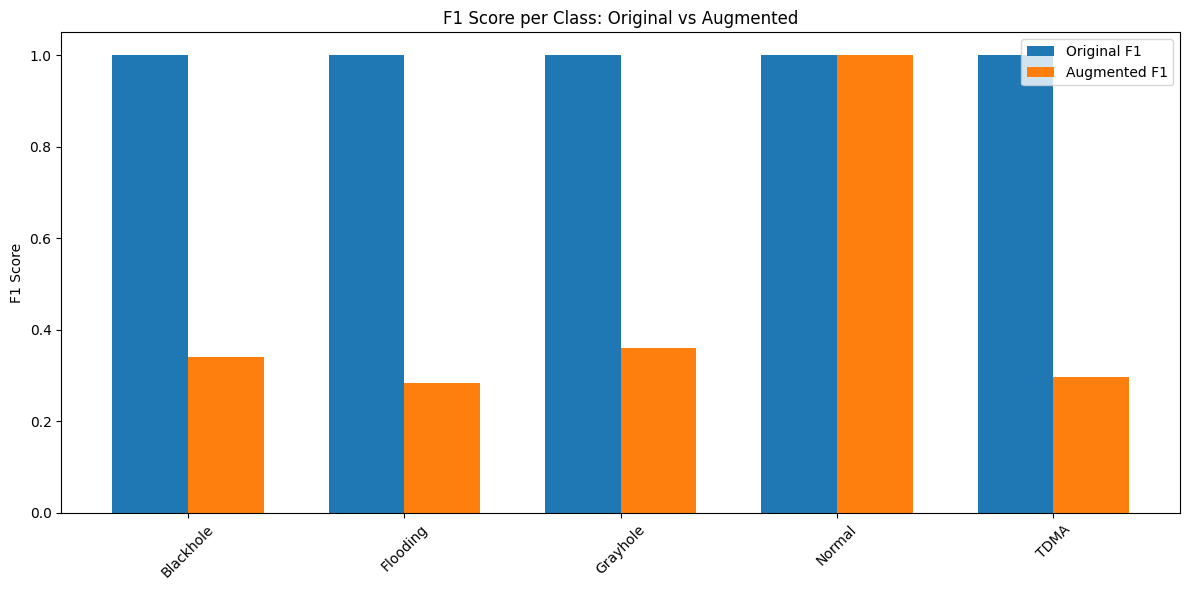

Overall Accuracy (Original): 1.0000
Overall Accuracy (Augmented): 0.6512


In [62]:
# Compare and visualize the results for both datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, recall_score, accuracy_score

# Calculate metrics for both datasets
f1_orig = f1_score(y_test, y_pred_orig, average=None, labels=np.unique(y_test))
f1_aug = f1_score(y_test_aug, y_pred_aug, average=None, labels=np.unique(y_test_aug))
recall_orig = recall_score(y_test, y_pred_orig, average=None, labels=np.unique(y_test))
recall_aug = recall_score(y_test_aug, y_pred_aug, average=None, labels=np.unique(y_test_aug))
accuracy_orig = accuracy_score(y_test, y_pred_orig)
accuracy_aug = accuracy_score(y_test_aug, y_pred_aug)

labels_list = np.unique(list(y_test) + list(y_test_aug))

x = np.arange(len(labels_list))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, f1_orig, width, label='Original F1')
plt.bar(x + width/2, f1_aug, width, label='Augmented F1')
plt.xticks(x, labels_list, rotation=45)
plt.ylabel('F1 Score')
plt.title('F1 Score per Class: Original vs Augmented')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Overall Accuracy (Original): {accuracy_orig:.4f}")
print(f"Overall Accuracy (Augmented): {accuracy_aug:.4f}")